## **Importing Libraries**

In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.datasets import fetch_20newsgroups
# from nltk.tokenize import word_tokenize #Used to extract words from documents
# from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
!pip install gensim


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [ ]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


## **Reading 20 Newsgroups Dataset**

In [2]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [3]:
df = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [ ]:
df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

## **Redaing PeopleWiki Datset**

In [ ]:
#We will retrieve the Wikipedia Articles Dataset
dataset = '/content/people_wiki.csv'
people_wiki_df = pd.read_csv(dataset)
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...


#**fetch_20newsgroups**

In [ ]:
df.data[:3]

['\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n',
 'In regards to fractal commpression, I have seen 2 fractal compressed "movies".\nThey were both fairly impressive.  The first one was a 64 gray scale "movie" of\nCasablanca, it was 1.3MB and had 11 minutes of 13 fps video.  It was a little\ngrainy but not bad at all.  The second one I saw was only 3 minutes but it\nhad 8 bit color with 10fps and measured in at 1.2MB.\n\nI consider the fractal movies a practical thing to explore.  But unlike many \nother formats out there, you do end up losi

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

###first we need to clean the text

In [6]:
def preprocess_text(text):
    # Step 1: Remove newlines and extra spaces
    text = text.replace("\n", " ").strip()

    # Step 2: Convert to lowercase
    text = text.lower()

    # Step 3: Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # Step 4: Tokenization to split the text to be words
    words = word_tokenize(text)

    # Step 5: Remove stopwords(the words that is'nt important and repeted like is, the)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Step 6: Lemmatization (convert words to their root form, e.g., "running" → "run")
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Step 7: Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text


#####convert text to datafram to upplay cleaning

In [7]:
import pandas as pd

# Convert to a DataFrame so we can upplay the preprocess_text function
news_df = pd.DataFrame({'text': df.data, 'category': df.target})
print(news_df.head())


                                                text  category
0  \n\nI think I can. Largely as a result of effo...         1
1  In regards to fractal commpression, I have see...         0
2  Background: The Orion spacedrive was a theoret...         1
3  930418\n\nDo what thou wilt shall be the whole...         2
4                                                            1


In [8]:
news_df['cleaned_text'] = news_df['text'].apply(preprocess_text)
print(news_df['cleaned_text'].head())

0    think largely result effort people reading gro...
1    regard fractal commpression seen 2 fractal com...
2    background orion spacedrive theoretical concep...
3    930418 thou wilt shall whole law honestly word...
4                                                     
Name: cleaned_text, dtype: object


###Feature extraction

In [9]:
#convert text to numeric and give high score to the most important words to make it suitable for ML
vectorizer = TfidfVectorizer(max_features = 15000)
numeric_cleaned_text = vectorizer.fit_transform(news_df['cleaned_text'])
normalizer = Normalizer()
numeric_cleaned_text = normalizer.fit_transform(numeric_cleaned_text)

##upplay k_means clustring

####upplay elbow method and silhouette_scores

In [ ]:
k_values=range(2,10)
interia=[]
silhouette_scores=[]
for k in k_values:
  kmeans=KMeans(n_clusters=k , random_state=42 , n_init=100 , max_iter= 1000)
  kmeans.fit(numeric_cleaned_text)
  interia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(numeric_cleaned_text,kmeans.labels_))

###plot elpow

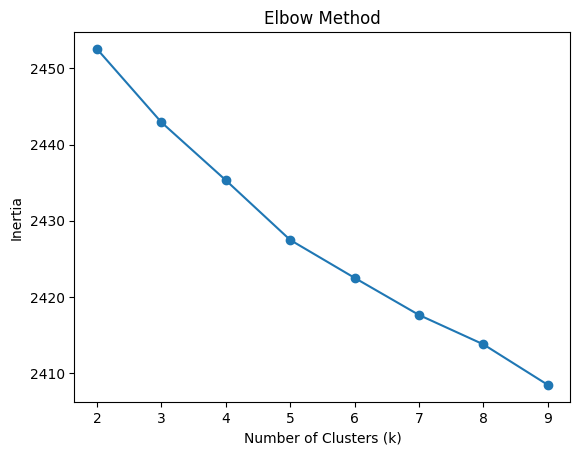

In [ ]:
plt.plot(k_values,interia,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

###plot silhouette_scores

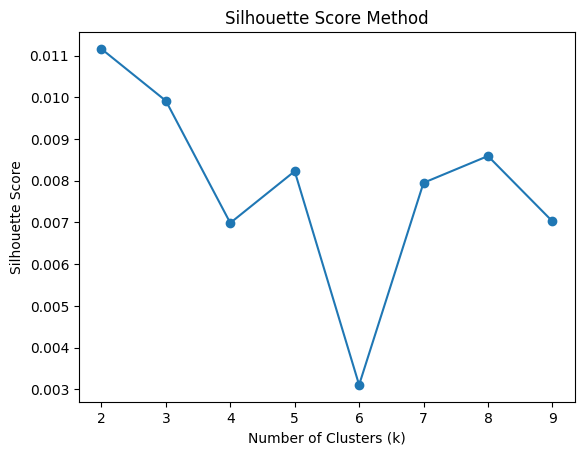

In [ ]:
plt.plot(k_values,silhouette_scores,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

###PCA for 3 clustring

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

In [11]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(numeric_cleaned_text.toarray())

In [22]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_pca)

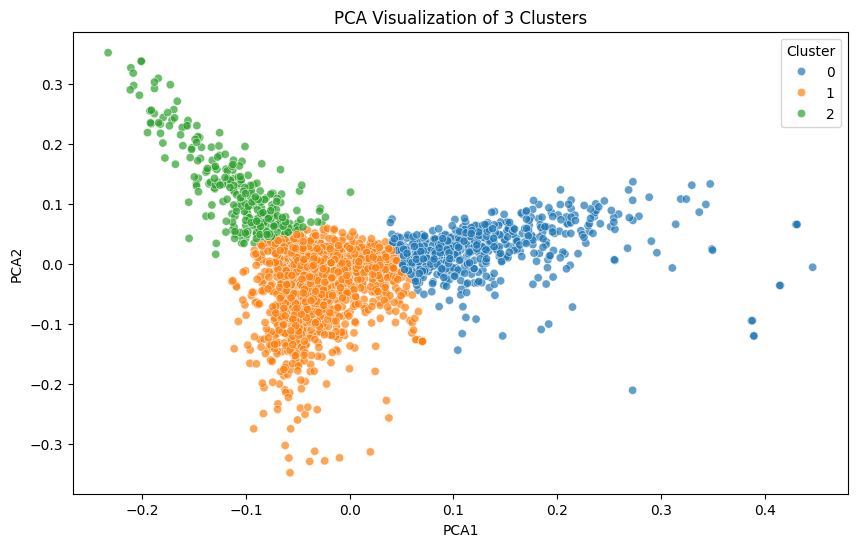

In [13]:
df_pca = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df_pca, alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f"PCA Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()


####silhouette_score after PCA

In [23]:
sil_score = silhouette_score(reduced_data_pca , clusters)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.4819


###TSNE visualization

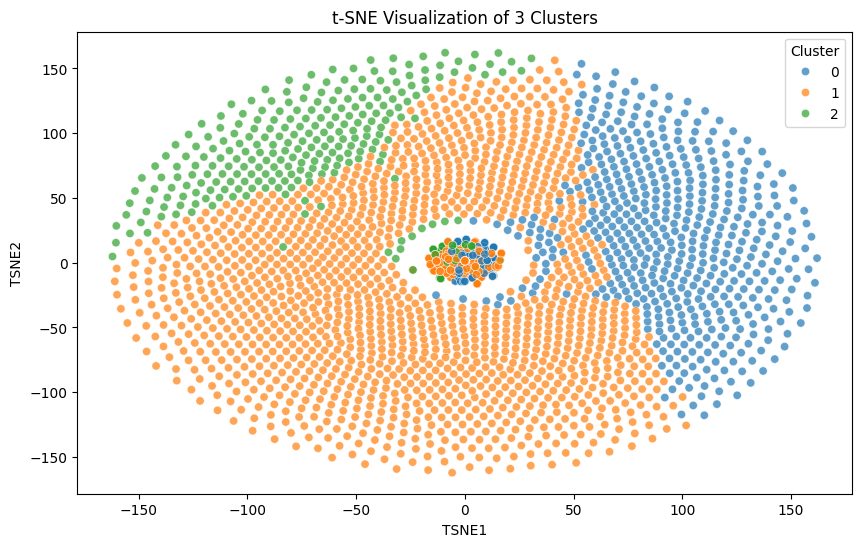

In [17]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(numeric_cleaned_text.toarray())

# Convert to DataFrame for visualization
df_vis = pd.DataFrame(reduced_data_tsna, columns=['TSNE1', 'TSNE2'])
df_vis['Cluster'] = clusters

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', data=df_vis, alpha=0.7)
plt.title(f"t-SNE Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()


In [18]:
numeric_cleaned_text = normalizer.fit_transform(numeric_cleaned_text)
kmeans = KMeans(n_clusters=optimal_k, random_state=42,max_iter=1000 , n_init=100)
clusters = kmeans.fit_predict(reduced_data_tsna)

In [19]:
sil_score = silhouette_score(reduced_data_tsna , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3433


###caculate purity score

In [15]:
import numpy as np
from scipy.stats import mode

def purity_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    clusters = np.unique(y_pred)  # Unique clusters
    correct_preds = 0  # Count correctly classified samples

    for cluster in clusters:
        indices = np.where(y_pred == cluster)[0]  # Get indices of this cluster
        true_labels = y_true[indices]  # Extract true labels for this cluster

        if len(true_labels) == 0:
            continue  # Skip empty clusters

        # Compute the most common true label in this cluster
        majority_label = mode(true_labels, keepdims=True).mode[0]

        # Count how many samples in this cluster belong to the majority label
        correct_preds += np.sum(true_labels == majority_label)

    # Compute purity
    return correct_preds / len(y_true)


In [24]:
# Compute Purity Score for K-Means with PCA
kmeans_purity = purity_score(news_df["category"], kmeans.labels_)
print(f"Purity Score for K-Means: {kmeans_purity:.4f}")

Purity Score for K-Means: 0.6909


In [21]:
# Compute Purity Score for K-Means using TSNE
kmeans_purity = purity_score(news_df["category"], clusters)
print(f"Purity Score for K-Means: {kmeans_purity:.4f}")

Purity Score for K-Means: 0.6318


##Hierarchical Clustering

In [ ]:
#compute link matrix it save the top words to visualization it using dendrogram.
linkage_matrix = linkage(numeric_cleaned_text[:200].toarray(), method='ward')

###plot dendrogram

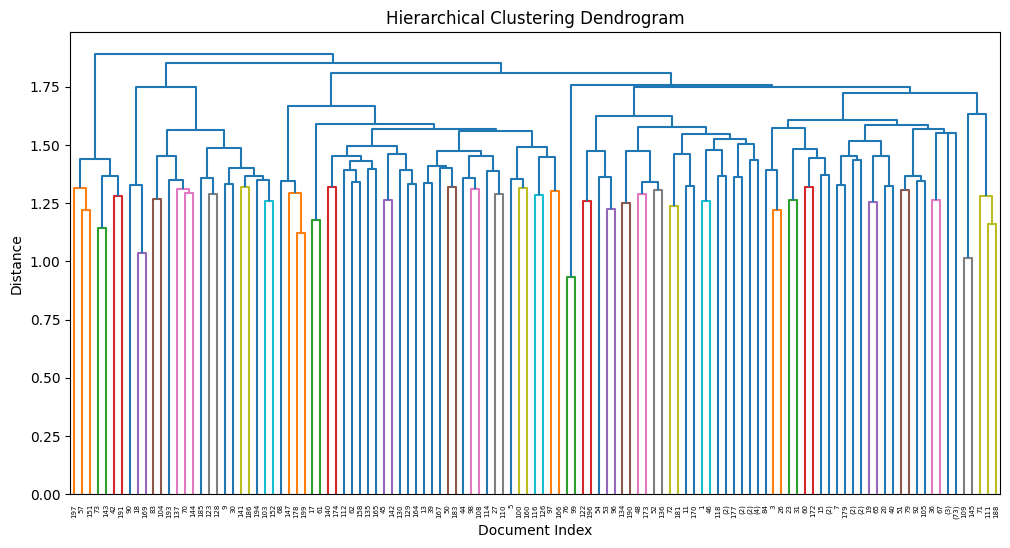

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)  # Show first 10 levels
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [ ]:
num_clusters =3
cluster_hirachy = AgglomerativeClustering(n_clusters=num_clusters,linkage='ward')
cluster_hirachy = cluster_hirachy.fit_predict(numeric_cleaned_text.toarray())

In [ ]:
sil_score = silhouette_score(numeric_cleaned_text , cluster_hirachy)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0084


###implement PCA

In [ ]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(numeric_cleaned_text.toarray())

In [ ]:
cluster =3
hierarchy = AgglomerativeClustering(n_clusters=cluster,linkage='ward')
cluster_labels = hierarchy.fit_predict(reduced_data_pca)

In [ ]:
df_pca = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels


###plot PCA

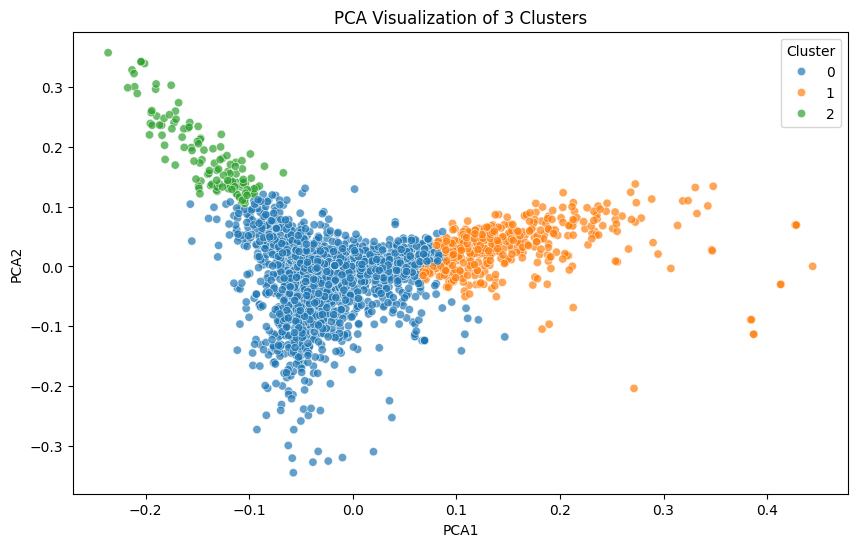

In [ ]:
cluster = 3
hierarchy = AgglomerativeClustering(n_clusters=cluster, linkage='ward')
cluster_labels = hierarchy.fit_predict(reduced_data_pca)

df_pca = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df_pca, alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f"PCA Visualization of {cluster} Clusters")
plt.legend(title="Cluster")
plt.show()

###TSNE visualization

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(numeric_cleaned_text.toarray())
hierarchy = AgglomerativeClustering(n_clusters=cluster, linkage='ward')
cluster_labels = hierarchy.fit_predict(reduced_data_tsna)

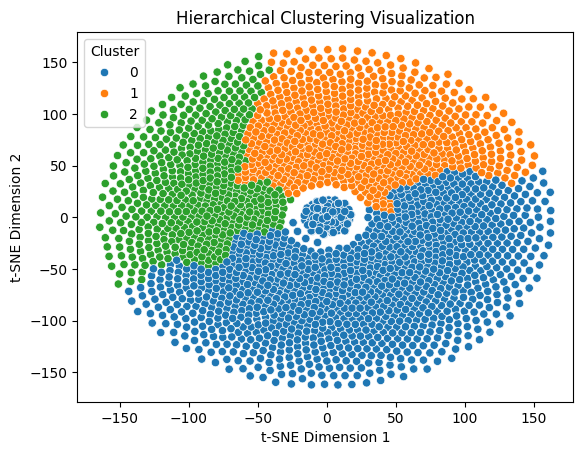

In [ ]:
sns.scatterplot(x=reduced_data_tsna[:, 0], y=reduced_data_tsna[:, 1], hue=cluster_labels, legend='full', palette='tab10')
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()


### silhouette_score

In [ ]:
sil_score = silhouette_score(reduced_data_tsna , cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2936


In [ ]:
purity = purity_score(news_df["category"], cluster_labels)
print(f"Purity Score: {purity:.4f}")

Purity Score: 0.5166


## Latent Dirichlet Allocation (LDA)

####victorlizsation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
##LDA works best with CountVectorizer instead of TF-IDF.
victorizer = CountVectorizer(max_features=15000)
bow_matrix = victorizer.fit_transform(news_df['cleaned_text'])

In [ ]:
print("Bag-of-Words Matrix Shape:", bow_matrix.shape)

Bag-of-Words Matrix Shape: (2588, 15000)


###implement LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
num_topics =3
LDA = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = LDA.fit_transform(bow_matrix)


In [ ]:
print("LDA Matrix Shape:", lda_matrix.shape)

LDA Matrix Shape: (2588, 3)


In [ ]:
cluster_labels = np.argmax(lda_matrix, axis=1)
sil_score = silhouette_score( bow_matrix ,cluster_labels )
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: -0.0197


In [ ]:
print(f"Perplexity Score: {LDA.perplexity(bow_matrix):.4f}")

Perplexity Score: 3690.2579


##Word Embeddings

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
#words with similar meanings get similar vectors
# Tokenize cleaned text
news_df["tokenized_text"] = news_df["cleaned_text"].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=news_df["tokenized_text"], vector_size=100, window=5, min_count=2, workers=4)


In [ ]:
def document_vector(words, model):

    #Convert words into document vector by averaging word embeddings.
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        return np.zeros(model.vector_size)  # If no valid words, return zero vector
    return np.mean(model.wv[valid_words], axis=0)


In [ ]:
# Apply function to all documents
doc_vectors = news_df["tokenized_text"].apply(lambda x: document_vector(x, word2vec_model)).to_list()
doc_vectors = np.array(doc_vectors)
print("Document Vectors Shape:", doc_vectors.shape)

###KMean clustring

In [ ]:
num_clusters =9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
news_df["cluster"] = kmeans.fit_predict(doc_vectors)

###Evaluate with Silhouette Score

In [ ]:

silhouette = silhouette_score(doc_vectors, news_df["cluster"])
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.2640


###Evaluate with purity Score

In [ ]:
# Compute Purity Score for K-Means
kmeans_purity = purity_score(news_df["category"], kmeans.labels_)
print(f"Purity Score for K-Means: {kmeans_purity:.4f}")


Purity Score for K-Means: 0.6522


###PCA

In [ ]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(doc_vectors)

In [ ]:
cluster = 3
kmeans = KMeans(n_clusters=cluster, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(reduced_data_pca)

In [ ]:
df_pca = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels


<Axes: xlabel='PCA1', ylabel='PCA2'>

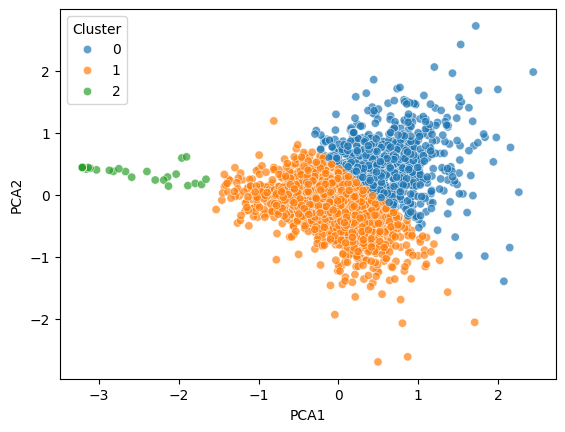

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df_pca, alpha=0.7)

In [ ]:
silhouette = silhouette_score(doc_vectors,cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.3801


In [ ]:
kmeans_purity = purity_score(news_df["category"], kmeans.labels_)
print(f"Purity Score for K-Means: {kmeans_purity:.4f}")

Purity Score for K-Means: 0.5746


###hirarichal clustring

In [ ]:
clusters = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = clusters.fit_predict(doc_vectors)

In [ ]:
silhouette = silhouette_score(doc_vectors,cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.2145


### evaluate with purity_score

In [ ]:
hierarchical_purity = purity_score(news_df["category"], cluster_labels)
print(f"Purity Score for Hierarchical Clustering: {hierarchical_purity:.4f}")

Purity Score for Hierarchical Clustering: 0.6480


PCA with AgglomerativeClustering

In [ ]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(doc_vectors)

In [ ]:
hierarchy = AgglomerativeClustering(n_clusters=cluster, linkage='ward')
cluster_labels = hierarchy.fit_predict(reduced_data_pca)

In [ ]:
df_pca = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

In [ ]:
silhouette = silhouette_score(doc_vectors,cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.3414


In [ ]:
hierarchical_purity = purity_score(news_df["category"], cluster_labels)
print(f"Purity Score : {hierarchical_purity:.4f}")

Purity Score : 0.5166


---------------

# so the best score is using kmeans with PCA and TfidfVectorizer

# purity_score(0.7)

# and silhouette_score(0.48)

---



#PeopleWiki Datset

###convert to datafram

In [ ]:
dataset_df = pd.read_csv(dataset)[['text']].copy()

In [ ]:
dataset_df

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
59066,olari elts born april 27 1971 in tallinn eston...
59067,scott francis crago born july 26 1963 twin bro...
59068,david william royce cass born 27 march 1962 in...
59069,keith hector elias born february 3 1972 in lac...


In [ ]:
dataset_df['cleaned_text'] = dataset_df['text'].apply(preprocess_text)
print(dataset_df['cleaned_text'].head())

0    digby morrell born 10 october 1979 former aust...
1    alfred j lewy aka sandy lewy graduated univers...
2    harpdog brown singer harmonica player active c...
3    franz rottensteiner born waidmannsfeld lower a...
4    henry krvits born 30 december 1974 tallinn bet...
Name: cleaned_text, dtype: object


##vicoraization

In [ ]:
#convert text to numeric and give high score to the most important words to make it suitable for ML
vectorizer = TfidfVectorizer(max_features = 20000 , ngram_range=(4,4))
numeric_cleaned_text = vectorizer.fit_transform(dataset_df['cleaned_text'])
normalizer = Normalizer()
numeric_cleaned_text = normalizer.fit_transform(numeric_cleaned_text)

##Kmeans

In [ ]:
elpow =[]
silhouette_scores=[]
for k in range(10,20):
  kmeans = KMeans(n_clusters=k , random_state=42, max_iter= 1000)
  kmeans.fit(numeric_cleaned_text)
  elpow.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ed8ba7b1300>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


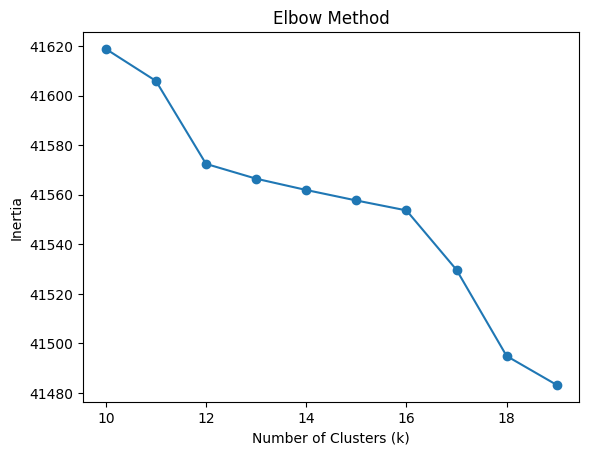

In [ ]:
plt.plot(range(10,20),elpow,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
optimal_k = 18
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=1000)
clusters = kmeans.fit_predict(numeric_cleaned_text)

In [ ]:
sil_score = silhouette_score(numeric_cleaned_text , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1481


##PCA

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
pca_df = PCA(n_components=2)
reduced_data_pca = pca_df.fit_transform(numeric_cleaned_text.toarray())

In [ ]:
optimal_k =15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_pca)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c7b991bd300>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


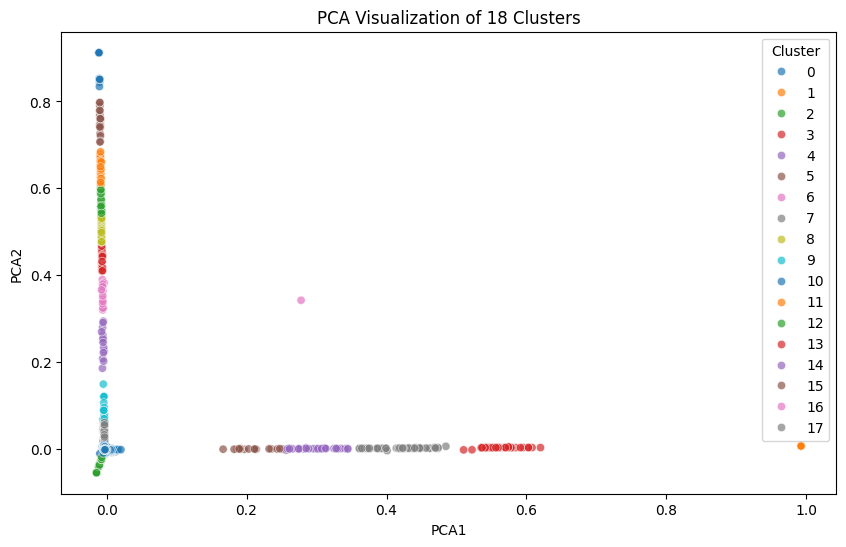

In [ ]:
pca_df = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=pca_df, alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f"PCA Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()


##PCA_silhouette_scores

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_score = silhouette_score(numeric_cleaned_text , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1474


### TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
sample_size = 8000
numeric_cleaned_text_df = pd.DataFrame.sparse.from_spmatrix(numeric_cleaned_text)
sample_df = numeric_cleaned_text_df.sample(n=sample_size, random_state=42)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(sample_df)

print("Data Normalized Successfully!")

Data Normalized Successfully!


In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(X_normalized.toarray())

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_tsna)

####plot TSNE

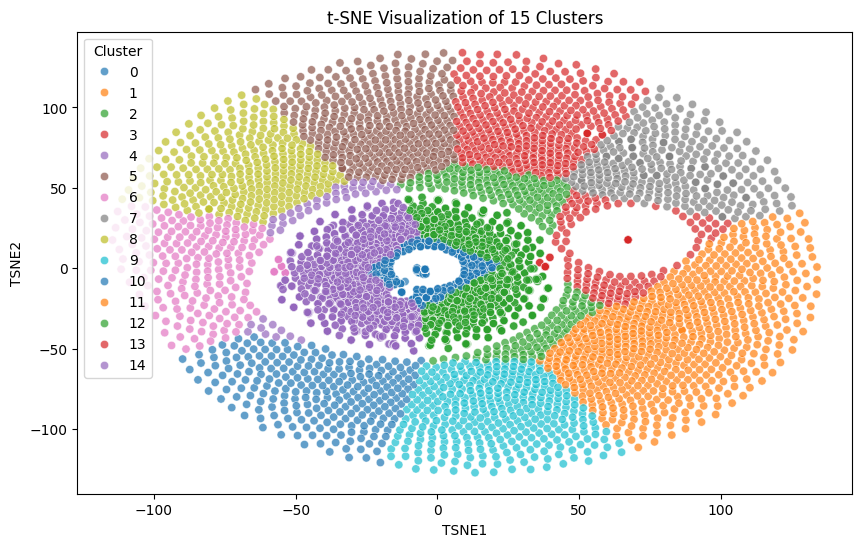

In [ ]:
df_vis = pd.DataFrame(reduced_data_tsna, columns=['TSNE1', 'TSNE2'])
df_vis['Cluster'] = clusters

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', data=df_vis, alpha=0.7)
plt.title(f"t-SNE Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()

####TSNE silhouette_scores

In [ ]:
sil_score = silhouette_score(X_normalized , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0619


#Hierarchical Clustering

In [ ]:
linkage_matrix = linkage(X_normalized.toarray(), method='ward')

###plot dendrogram

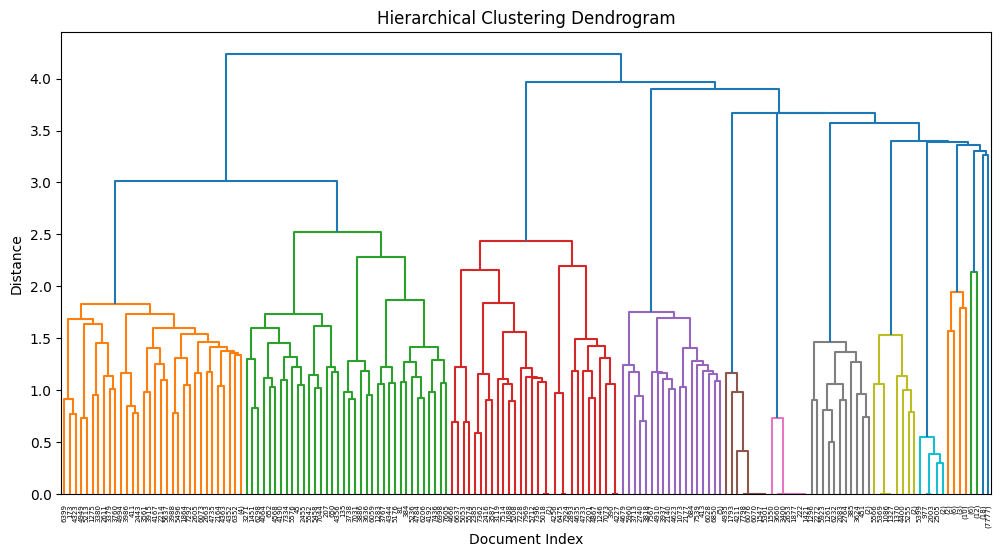

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)  # Show first 10 levels
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

##PCA hierarchial

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_df = PCA(n_components=2)
reduced_data_pca = pca_df.fit_transform(X_normalized.toarray())

In [ ]:
optimal_k = 15
cluster_hierarchical = AgglomerativeClustering(n_clusters=optimal_k,linkage='ward')
cluster_labels = cluster_hierarchical.fit_predict(X_normalized.toarray())

####PCA silouette_score

In [ ]:
sil_score = silhouette_score(X_normalized , cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1287


###TSNE

In [ ]:
optimal_k =15
cluster_hierarchical = AgglomerativeClustering(n_clusters=optimal_k,linkage='ward')
cluster_labels = cluster_hierarchical.fit_predict(reduced_data_tsna)

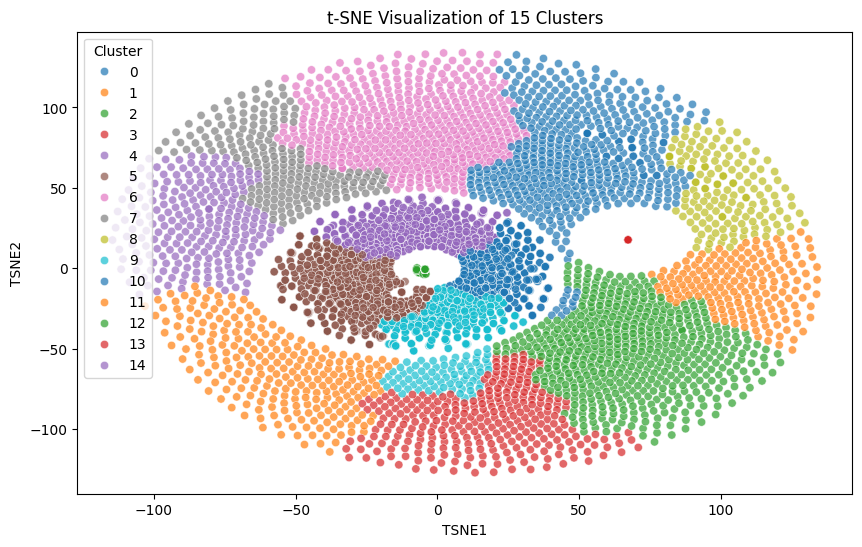

In [ ]:
df_vis = pd.DataFrame(reduced_data_tsna, columns=['TSNE1', 'TSNE2'])
df_vis['Cluster'] = cluster_labels

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', data=df_vis, alpha=0.7)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title(f"t-SNE Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()

In [ ]:
sil_score = silhouette_score(reduced_data_tsna , cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4755


##word embedding

In [ ]:
dataset_df['tokenized_text'] = dataset_df['cleaned_text'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=dataset_df['tokenized_text'], vector_size=100, window=5, min_count=2, workers=4)

In [ ]:
doc_vectors = dataset_df['tokenized_text'].apply(lambda x: document_vector(x, word2vec_model)).to_list()
doc_vectors = np.array(doc_vectors)
print("Document Vectors Shape:", doc_vectors.shape)

Document Vectors Shape: (59071, 100)


###KMeans

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(doc_vectors)

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1345


####TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(doc_vectors)

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_tsna)

#####Silhouette TSNE

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1000


####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(doc_vectors)

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_pca)

####silhouette PCA

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0358


In [ ]:
import seaborn as sns

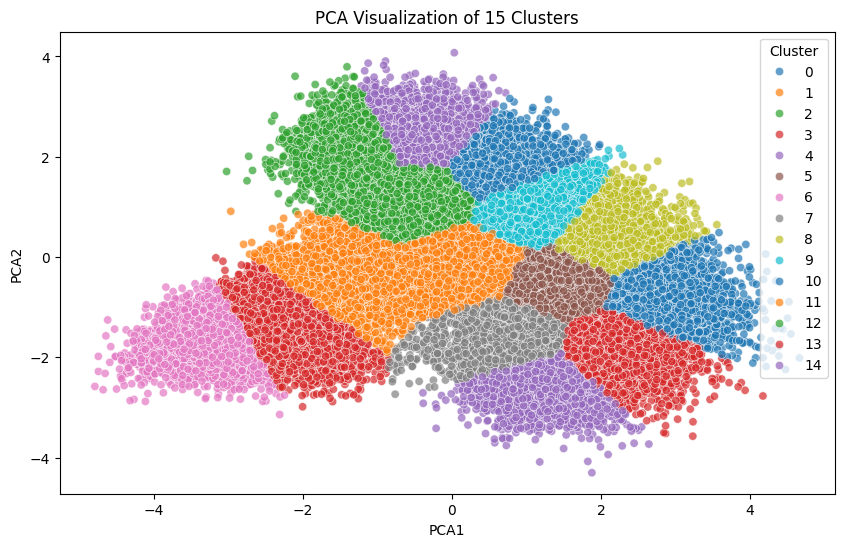

In [ ]:
pca_df = pd.DataFrame(reduced_data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=pca_df, alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f"PCA Visualization of {optimal_k} Clusters")
plt.legend(title="Cluster")
plt.show()

-----------
# so the best one is using AgglomerativeClustering with TSNE and victoraization with silhouette(0.4)

-------------


---------------------